In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [26]:
RISKY_ASSET = 'KO'
START_DATE = '2018-01-01'
END_DATE = '2022-03-17'

In [27]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=False)

[*********************100%***********************]  1 of 1 completed


Average return: 0.03%


<AxesSubplot:title={'center':'KO returns: 2018-01-01 - 2022-03-17'}, xlabel='Date'>

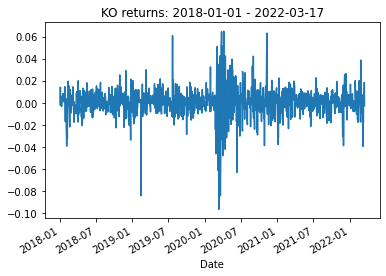

In [28]:
close = df['Close']
returns = close.pct_change().dropna()
print(f'Average return: {100 * returns.mean():.2f}%')
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')

In [29]:
train = returns['2018-01-01':'2020-01-04']
test = returns['2020-01-05':'2022-03-15']

In [30]:
T = len(test)
N = len(test)
s_0 = close[train.index[-1]]
N_SIM = 1000
mu = train.mean()
sigma = train.std()

In [31]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt),
                         size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_step + sigma * W)
    
    S_t = np.insert(S_t, 0, s_0, axis=1)
    
    return S_t

In [32]:
gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N)


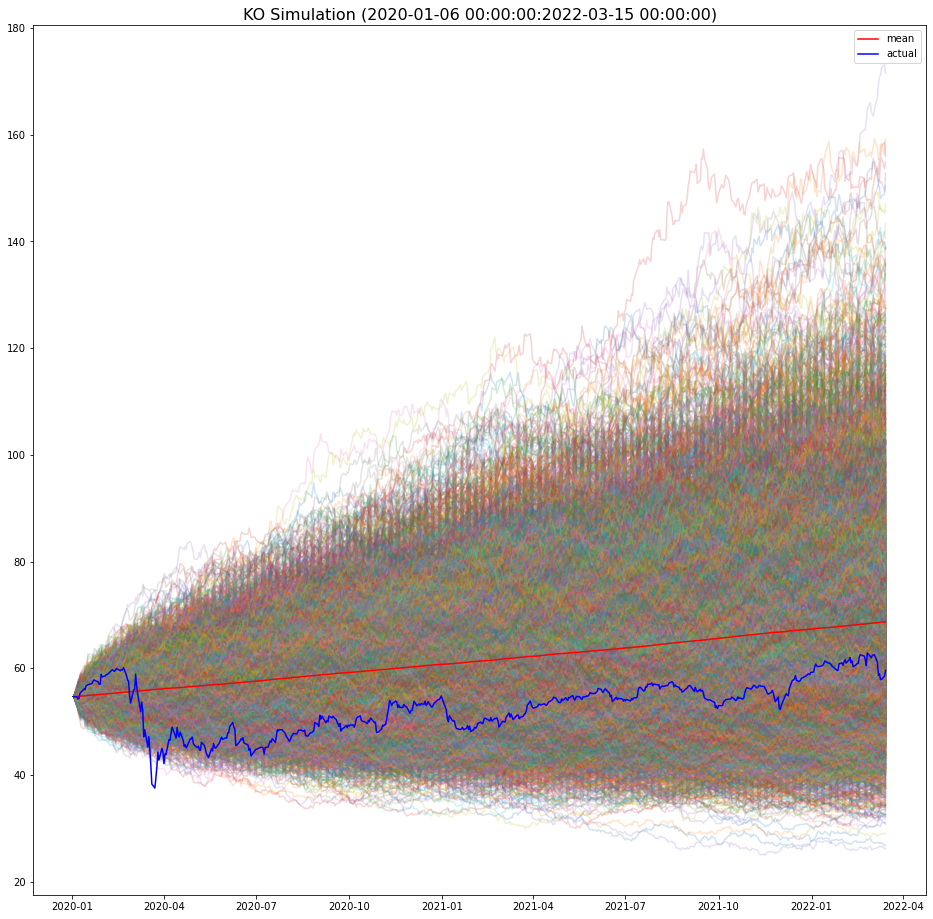

In [33]:
LAST_TRAIN_DATE = train.index[-1]
FIRST_TEST_DATE = test.index[0]
LAST_TEST_DATE = test.index[-1]

PLOT_TITLE = (f'{RISKY_ASSET} Simulation 'f'({FIRST_TEST_DATE}:{LAST_TEST_DATE})')

selected_indices = close[LAST_TRAIN_DATE:LAST_TEST_DATE].index

index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations),index=index)

# plotting
ax = gbm_simulations_df.plot(figsize=(16,16),alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1),
 color='red')

line_2, = ax.plot(index, close[LAST_TRAIN_DATE:LAST_TEST_DATE],
 color='blue')

ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))